# Aritificial Intelligence Capstone (Amazon Use Case)

__Submitted By: Timothy B. Bumagat__

__Guided by: Nishant Singh__

DESCRIPTION

Problem Statement

Amazon is an online shopping website that now caters to millions of people everywhere. Over 34,000 consumer reviews for Amazon brand products like Kindle, Fire TV Stick and more are provided. 
The dataset has attributes like brand, categories, primary categories, reviews.title, reviews.text, and the sentiment. Sentiment is a categorical variable with three levels "Positive", "Negative“, and "Neutral". For a given unseen data, the sentiment needs to be predicted.
You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.
Dataset Snapshot:

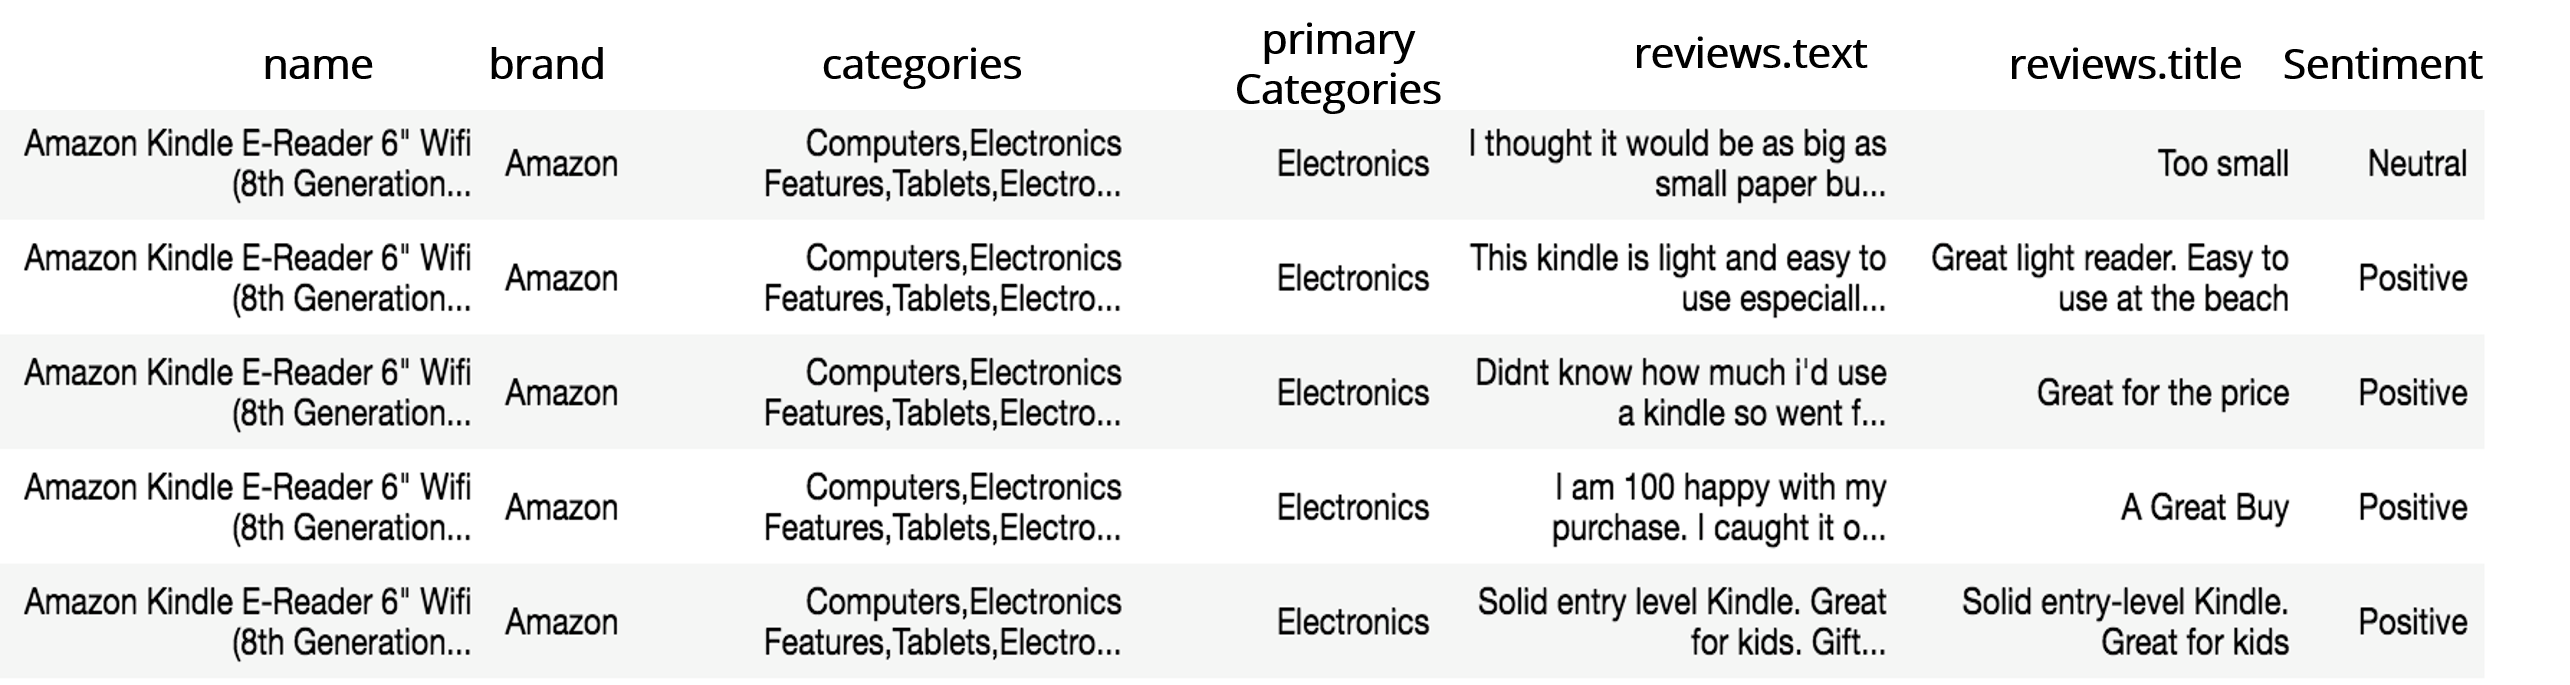



#### Project Task: Week 1

Class Imbalance Problem:

1. Perform an EDA on the dataset.

a)  See what a positive, negative, and neutral review looks like

b)  Check the class count for each class. It’s a class imbalance problem.

2. Convert the reviews in Tf-Idf score.

3. Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

#### Project Task: Week 2

Tackling Class Imbalance Problem:

Oversampling or undersampling can be used to tackle the class imbalance problem. 
In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score. Use F1-Score as the evaluation criteria for this      project.
Use Tree-based classifiers like Random Forest and XGBoost.
       Note: Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.

#### Project Task: Week 3

Model Selection:

Apply multi-class SVM’s and neural nets.
Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.
Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.

#### Project Task: Week 4

Applying LSTM:

1. Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.). Hint: Another variation of LSTM, GRU (Gated Recurrent Units) can be tried as well.

2. Compare the accuracy of neural nets with traditional ML based algorithms.

3. Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive, negative, and neutral. 

Hint: Use techniques like Grid Search, Cross-Validation and Random Search

#### Optional Tasks: Week 4

Topic Modeling:

1. Cluster similar reviews.

Note: Some reviews may talk about the device as a gift-option. Other reviews may be about product looks and some may highlight about its battery and performance. Try naming the clusters.
   
2. Perform Topic Modeling
Hint: Use scikit-learn provided Latent Dirchlette Allocation (LDA) and Non-Negative Matrix Factorization (NMF).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# Function to display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Importing Dataset
train = pd.read_csv('train_data_AI Capstone.csv')
test = pd.read_csv('test_data_AI Capstone.csv')
test_hidden = pd.read_csv('test_data_hidden_AI Capstone.csv')
print("The train dataset has:", train.shape)
print("\nThe test dataset has:", test.shape)
print("\nThe hidden_test dataset has:", test_hidden.shape)

The train dataset has: (4000, 8)

The test dataset has: (1000, 7)

The hidden_test dataset has: (1000, 8)


In [4]:
# We will append test_hidden dataset with our train dataset because Simplilearn designed the test_hidden dataset to be the test set.
train = train.append(test_hidden) 
train.shape

(5000, 8)

In [5]:
# Checking train dataset
train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews_text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [6]:
# Checking test dataset
test.head()

,name,brand,categories,primaryCategories,reviews.date,reviews_text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               5000 non-null   object
 1   brand              5000 non-null   object
 2   categories         5000 non-null   object
 3   primaryCategories  5000 non-null   object
 4   reviews.date       5000 non-null   object
 5   reviews_text       5000 non-null   object
 6   reviews.title      4987 non-null   object
 7   sentiment          5000 non-null   object
dtypes: object(8)
memory usage: 351.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews_text       1000 non-null   object
 6   reviews.title      997 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


## Project Task: Week 1
Class Imbalance Problem:

Perform an EDA on the dataset.

a)  See what a positive, negative, and neutral review looks like

b)  Check the class count for each class. It’s a class imbalance problem.
Convert the reviews in Tf-Idf score.

Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

## Exploratory Data Analysis

See what a positive, negative, and neutral review looks like. Check the class count for each class. It’s a class imbalance problem. 

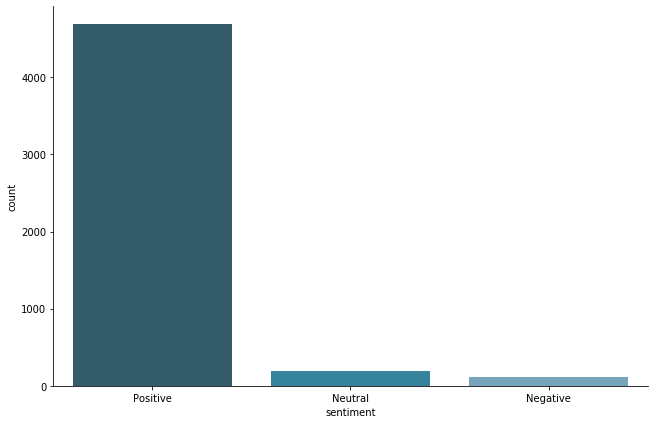

Positive    4686
Neutral      197
Negative     117
Name: sentiment, dtype: int64


In [9]:
sns.catplot(x="sentiment", data=train, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show()

print(train['sentiment'].value_counts())

### Pre-processing of Text Data
Removing useless features and converting text data to tf-idf, then we do a train test split.

In [10]:
features = train.iloc[:, 5].values
labels = train.iloc[:, 7].values

In [11]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [12]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

### Multinomial Naive-Bayes
Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
MNb = MultinomialNB()

In [16]:
MNb.fit(X_train, y_train)
MNb_tfidf = MNb.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Confusion Matrix: \n', confusion_matrix(y_test, MNb_tfidf))
print('\n Classification Report: \n', classification_report(y_test, MNb_tfidf))
print('\n Accuracy: ', accuracy_score(y_test, MNb_tfidf))

Confusion Matrix: 
 [[  1   0  29]
 [  0   0  44]
 [  0   0 926]]

 Classification Report: 
               precision    recall  f1-score   support

    Negative       1.00      0.03      0.06        30
     Neutral       0.00      0.00      0.00        44
    Positive       0.93      1.00      0.96       926

    accuracy                           0.93      1000
   macro avg       0.64      0.34      0.34      1000
weighted avg       0.89      0.93      0.89      1000


 Accuracy:  0.927


C:\Users\Timothy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Project Task: Week 2

Tackling Class Imbalance Problem:

Oversampling or undersampling can be used to tackle the class imbalance problem. 
In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score. Use F1-Score as the evaluation criteria for this      project.
Use Tree-based classifiers like Random Forest and XGBoost.
       Note: Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.

### Balancing Sentiment for Multinomial NB

We need to fix the imbalanced data by undersampling the 'Sentiment' column. Why undersampling and not oversampling? Because we do not have a lot of data! We will also use this undersampled dataset for the rest of the machine learning and neural nets that we will use because the results with the imbalanced dataset is too unreliable.

In [18]:
train['sentiment'].value_counts()

Positive    4686
Neutral      197
Negative     117
Name: sentiment, dtype: int64

Count of sentiment column: 
 Negative    117
Neutral     117
Positive    117
Name: sentiment, dtype: int64


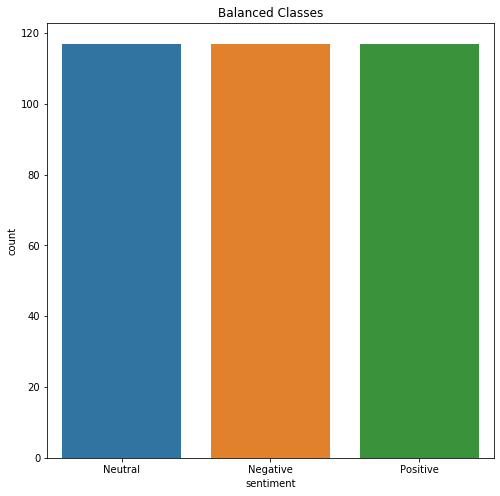

In [19]:
# Shuffle the Dataset.
shuffled_train = train.sample(frac=1, random_state=4)

# Setting the random sample to only limit Neutral and Positive Data to 117 to match Negative count.
Negative = shuffled_train.loc[shuffled_train['sentiment'] == 'Negative']
Neutral = shuffled_train.loc[shuffled_train['sentiment'] == 'Neutral'].sample(n=117, random_state=42)
Positive = shuffled_train.loc[shuffled_train['sentiment'] == 'Positive'].sample(n=117, random_state=42)

# Concatenating Datasets
balanced_train = pd.concat([Neutral, Negative, Positive])

# Checking number of sentiment
print('Count of sentiment column: \n', balanced_train['sentiment'].value_counts())

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('sentiment', data=balanced_train)
plt.title('Balanced Classes')
plt.show()

### Pre-processing text data for Balanced Dataset
Removing useless features and converting text data to tf-idf, then we do a train test split.

In [20]:
balanced_features = balanced_train.iloc[:, 5].values
balanced_labels = balanced_train.iloc[:, 7].values

In [21]:
balanced_processed_features = []

for sentence in range(0, len(balanced_features)):
    # Remove all the special characters
    balanced_processed_feature = re.sub(r'\W', ' ', str(balanced_features[sentence]))

    # Converting to Lowercase
    balanced_processed_feature = balanced_processed_feature.lower()

    balanced_processed_features.append(balanced_processed_feature)

In [22]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
balanced_processed_features = vectorizer.fit_transform(balanced_processed_features).toarray()

In [23]:
b_X_train, b_X_test, b_y_train, b_y_test = train_test_split(balanced_processed_features, balanced_labels, test_size=0.2, random_state=0)

### Applying Multinomial NB in Balanced Dataset

In [24]:
MNb.fit(b_X_train, b_y_train)
MNb_tfidf = MNb.predict(b_X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Confusion Matrix: \n', confusion_matrix(b_y_test, MNb_tfidf))
print('\n Classification Report: \n', classification_report(b_y_test, MNb_tfidf))
print('\n Accuracy: ', accuracy_score(b_y_test, MNb_tfidf))

Confusion Matrix: 
 [[15  6  4]
 [ 9 12  8]
 [ 1  3 13]]

 Classification Report: 
               precision    recall  f1-score   support

    Negative       0.60      0.60      0.60        25
     Neutral       0.57      0.41      0.48        29
    Positive       0.52      0.76      0.62        17

    accuracy                           0.56        71
   macro avg       0.56      0.59      0.57        71
weighted avg       0.57      0.56      0.56        71


 Accuracy:  0.5633802816901409


Use Tree-based classifiers like Random Forest and XGBoost. Note: Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(b_X_train, b_y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [27]:
rf_output = rf.predict(b_X_test)

In [28]:
print('Confusion Matrix: \n', confusion_matrix(b_y_test, rf_output))
print('\n Classification Report: \n', classification_report(b_y_test, rf_output))
print('\n Accuracy: ', accuracy_score(b_y_test, rf_output))

Confusion Matrix: 
 [[22  1  2]
 [10 15  4]
 [ 2  6  9]]

 Classification Report: 
               precision    recall  f1-score   support

    Negative       0.65      0.88      0.75        25
     Neutral       0.68      0.52      0.59        29
    Positive       0.60      0.53      0.56        17

    accuracy                           0.65        71
   macro avg       0.64      0.64      0.63        71
weighted avg       0.65      0.65      0.64        71


 Accuracy:  0.647887323943662


### XGBoost

In [29]:
from xgboost import XGBClassifier

In [30]:
xgb = XGBClassifier(random_state=29,learning_rate=0.7)

In [31]:
xgb.fit(b_X_train, b_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=29, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
xgb_output = xgb.predict(b_X_test)

In [33]:
print('Confusion Matrix: \n', confusion_matrix(b_y_test, xgb_output))
print('\n Classification Report: \n', classification_report(b_y_test, xgb_output))
print('\n Accuracy: ', accuracy_score(b_y_test, xgb_output))

Confusion Matrix: 
 [[21  1  3]
 [ 6 16  7]
 [ 3  5  9]]

 Classification Report: 
               precision    recall  f1-score   support

    Negative       0.70      0.84      0.76        25
     Neutral       0.73      0.55      0.63        29
    Positive       0.47      0.53      0.50        17

    accuracy                           0.65        71
   macro avg       0.63      0.64      0.63        71
weighted avg       0.66      0.65      0.64        71


 Accuracy:  0.647887323943662


### Analysis for Week 2

Utilizing the F1 score as the evaluation critera for the machine learning models used for the 2nd week task, the following are the F1 scores (weighted average) with its machine learning algorithm:

__Multinomial NB: 56%__

__Random Forest: 64%__

__XGBoost: 64%__

Hence, using the F1 score, XGBoost and Random Forest has the highest scores.

## Project Task: Week 3

Model Selection:

Apply multi-class SVM’s and neural nets.
Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.
Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.

## Multi-Class Support Vector Machine

We will use and observe the 4 types (Linear kernel, RBF Kernel, Polynomial Kernel, Sigmoid Kernel) of different hyperplanes for SVM applied to our use case.

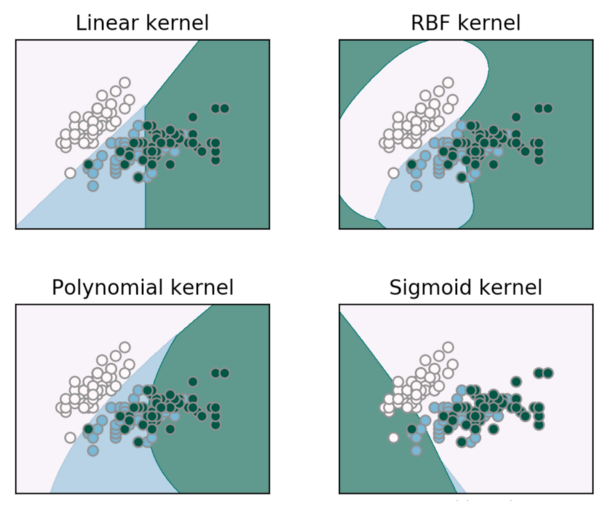

Source: https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02![1_qZFPN60NvwbFE_tRg2YPoQ.png]

In [34]:
from sklearn import svm

#### Setting SVM for the 4 kernels, predicting it, setting up Confusion Matrix, Classification Report and Accuracy Score

In [35]:
# Linear Kernel
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(b_X_train, b_y_train)
linear_pred = linear.predict(b_X_test)
cm_lin = confusion_matrix(b_y_test, linear_pred)
cr_lin = classification_report(b_y_test, linear_pred)
accuracy_lin = linear.score(b_X_test, b_y_test)

# RBF Kernel
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(b_X_train, b_y_train)
rbf_pred = rbf.predict(b_X_test)
cm_rbf = confusion_matrix(b_y_test, rbf_pred)
cr_rbf = classification_report(b_y_test, rbf_pred)
accuracy_rbf = rbf.score(b_X_test, b_y_test)

# Polynomial Kernel
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(b_X_train, b_y_train)
poly_pred = poly.predict(b_X_test)
cm_poly = confusion_matrix(b_y_test, poly_pred)
cr_poly = classification_report(b_y_test, poly_pred)
accuracy_poly = poly.score(b_X_test, b_y_test)

# Sigmoid Kernel
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(b_X_train, b_y_train)
sig_pred = sig.predict(b_X_test)
cm_sig = confusion_matrix(b_y_test, sig_pred)
cr_sig = classification_report(b_y_test, sig_pred)
accuracy_sig = sig.score(b_X_test, b_y_test)

#### Linear Kernel Results

In [36]:
print('Confusion Matrix of Linear Kernel: \n', cm_lin)
print('\n')
print('Classification Report of Linear Kernel: \n', cr_lin)
print('\n')
print('Accuracy score of Linear Kernel: \n', accuracy_lin)

Confusion Matrix of Linear Kernel: 
 [[17  6  2]
 [ 6 16  7]
 [ 2  5 10]]


Classification Report of Linear Kernel: 
               precision    recall  f1-score   support

    Negative       0.68      0.68      0.68        25
     Neutral       0.59      0.55      0.57        29
    Positive       0.53      0.59      0.56        17

    accuracy                           0.61        71
   macro avg       0.60      0.61      0.60        71
weighted avg       0.61      0.61      0.61        71



Accuracy score of Linear Kernel: 
 0.6056338028169014


####  RBF Kernel Results

In [37]:
print('Confusion Matrix of RBF Kernel: \n', cm_rbf)
print('\n')
print('Classification Report of RBF Kernel: \n', cr_rbf)
print('\n')
print('Accuracy score of RBF Kernel: \n', accuracy_rbf)

Confusion Matrix of RBF Kernel: 
 [[17  6  2]
 [ 7 16  6]
 [ 1  4 12]]


Classification Report of RBF Kernel: 
               precision    recall  f1-score   support

    Negative       0.68      0.68      0.68        25
     Neutral       0.62      0.55      0.58        29
    Positive       0.60      0.71      0.65        17

    accuracy                           0.63        71
   macro avg       0.63      0.65      0.64        71
weighted avg       0.63      0.63      0.63        71



Accuracy score of RBF Kernel: 
 0.6338028169014085


#### Polynomial Kernel Results

In [38]:
print('Confusion Matrix of Polynomial Kernel: \n', cm_poly)
print('\n')
print('Classification Report of Polynomial Kernel: \n', cr_poly)
print('\n')
print('Accuracy score of Polynomial Kernel: \n', accuracy_poly)

Confusion Matrix of Polynomial Kernel: 
 [[14  4  7]
 [ 4 13 12]
 [ 2  2 13]]


Classification Report of Polynomial Kernel: 
               precision    recall  f1-score   support

    Negative       0.70      0.56      0.62        25
     Neutral       0.68      0.45      0.54        29
    Positive       0.41      0.76      0.53        17

    accuracy                           0.56        71
   macro avg       0.60      0.59      0.56        71
weighted avg       0.62      0.56      0.57        71



Accuracy score of Polynomial Kernel: 
 0.5633802816901409


#### Sigmoid Kernel Results

In [39]:
print('Confusion Matrix of Sigmoid Kernel: \n', cm_sig)
print('\n')
print('Classification Report of Sigmoid Kernel: \n', cr_sig)
print('\n')
print('Accuracy score of Sigmoid Kernel: \n', accuracy_sig)

Confusion Matrix of Sigmoid Kernel: 
 [[17  6  2]
 [ 7 15  7]
 [ 2  6  9]]


Classification Report of Sigmoid Kernel: 
               precision    recall  f1-score   support

    Negative       0.65      0.68      0.67        25
     Neutral       0.56      0.52      0.54        29
    Positive       0.50      0.53      0.51        17

    accuracy                           0.58        71
   macro avg       0.57      0.58      0.57        71
weighted avg       0.58      0.58      0.58        71



Accuracy score of Sigmoid Kernel: 
 0.5774647887323944


## Recurrent Neural Network with Long Short Term Memory

In [40]:
# tokenizing and padding reviews.text
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tk = Tokenizer(lower=True)
tk.fit_on_texts(balanced_train['reviews_text'])
tokenized_review = tk.texts_to_sequences(balanced_train['reviews_text'])
padded_tokenized_review = pad_sequences(tokenized_review, maxlen=100, padding='post')

In [41]:
# Label encoding target
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

# Assigning variables and splitting the dataset
features = padded_tokenized_review
target = label_encoder.fit_transform(balanced_train['sentiment']) #Label encoded target

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                        target, test_size = 0.20, random_state = 10)

features_train.shape,features_test.shape, target_train.shape, target_test.shape

((280, 100), (71, 100), (280,), (71,))

In [42]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Dense, Dropout

vocabulary_size = len(tk.word_counts.keys())+1
max_words = 100

embedding_size = 32
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(500))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
model.fit(features_train, target_train, epochs=60)

Epoch 1/60
9/9 [==============================] - 2s 248ms/step - loss: 0.1154 - accuracy: 0.3500
Epoch 2/60
9/9 [==============================] - 2s 244ms/step - loss: 0.0724 - accuracy: 0.3357
Epoch 3/60
9/9 [==============================] - 2s 235ms/step - loss: -0.0445 - accuracy: 0.3357
Epoch 4/60
9/9 [==============================] - 2s 231ms/step - loss: -0.0721 - accuracy: 0.3357
Epoch 5/60
9/9 [==============================] - 2s 231ms/step - loss: -0.0490 - accuracy: 0.3357
Epoch 6/60
9/9 [==============================] - 2s 231ms/step - loss: -0.0604 - accuracy: 0.3357
Epoch 7/60
9/9 [==============================] - 2s 234ms/step - loss: -0.0224 - accuracy: 0.3357
Epoch 8/60
9/9 [==============================] - 2s 231ms/step - loss: -0.0159 - accuracy: 0.3357
Epoch 9/60
9/9 [==============================] - 2s 230ms/step - loss: -0.1004 - accuracy: 0.3357
Epoch 10/60
9/9 [==============================] - 2s 232ms/step - loss: -0.1113 - accuracy: 0.3357
Epoch 11/60

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           60448     
_________________________________________________________________
lstm (LSTM)                  (None, 500)               1066000   
_________________________________________________________________
dense (Dense)                (None, 1)                 501       
Total params: 1,126,949
Trainable params: 1,126,949
Non-trainable params: 0
_________________________________________________________________


In [45]:
test_loss, test_acc = model.evaluate(features_test,target_test)

print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 48ms/step - loss: -3.1093 - accuracy: 0.3239
Test accuracy: 0.3239436745643616


In [46]:
predictions = model.predict(features_test)

In [47]:
accuracy_score(target_test, predictions.round())

0.323943661971831

In [48]:
cnf_matrix=confusion_matrix(target_test, predictions.round())
cnf_matrix

array([[ 0, 25,  0],
       [ 0, 23,  0],
       [ 0, 23,  0]], dtype=int64)

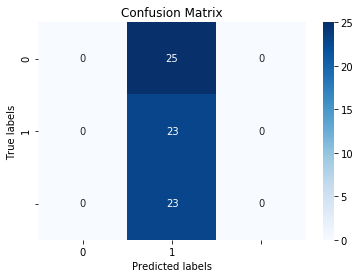

In [49]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

## Ensemble Technique: Voting Classifier
Used Voting Classifier Technique on Random Forest, XGBoost, Linear SVM, RBF SVM, Polynomial SVM, Sigmoid SVM.

In [50]:
from sklearn.ensemble import VotingClassifier 

In [51]:
# group / ensemble of models 
estimator = []
estimator.append(('Random Forest', RandomForestClassifier(n_estimators=200, random_state=0)))
estimator.append(('XGBoost', XGBClassifier(random_state=29, learning_rate=0.7)))
estimator.append(('Linear SVM', svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')))
estimator.append(('RBF SVM', svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')))
estimator.append(('Polynomial SVM', svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')))
estimator.append(('Sigmoid SVM', svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')))

In [52]:
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(b_X_train, b_y_train) 
ensemble_pred = vot_hard.predict(b_X_test) 

# Checking Confusion Matrix, Classification Report, and Accuracy Score 
print('Confusion Matrix: \n', confusion_matrix(b_y_test, ensemble_pred))
print('\n Classification Report: \n', classification_report(b_y_test, ensemble_pred))
print('\n Accuracy: ', accuracy_score(b_y_test, ensemble_pred))

Confusion Matrix: 
 [[17  6  2]
 [ 7 17  5]
 [ 2  6  9]]

 Classification Report: 
               precision    recall  f1-score   support

    Negative       0.65      0.68      0.67        25
     Neutral       0.59      0.59      0.59        29
    Positive       0.56      0.53      0.55        17

    accuracy                           0.61        71
   macro avg       0.60      0.60      0.60        71
weighted avg       0.60      0.61      0.60        71


 Accuracy:  0.6056338028169014


## Engineering a Sentiment Score using VADER
Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements.

We will utilize the Valence Aware Dictionary and sEntiment Reasoner to engineer the sentiment score then compare this score, apply SVM, RNN, and Voting classifier; and check the accuracy compared to the ones we did before.

In [53]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

I will be adding 3 columns to describe the Sentiment Score of VADER Sentiment Analysis

1) __Sentiment Prevalence Score__ - shows us the prevalence of each sentiment per review. 

2) __Compound Sentiment Score__ - Utilized the compound score to show the sentiment score of each review. The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive)

3) __Vader Sentiment Score__ - is the direct interpretation of the Compound Sentiment Score. We will use this classification for the Multi Class SVM, RNN, Voting Classifier, and in the 4th week, the GRU; and will compare the accuracy with the given 'sentiment' column.

Reference: https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

In [54]:
# Sentiment Prevalence Score
balanced_train['Sentiment Prevalent Score'] = balanced_train['reviews_text'].apply(lambda reviews_text: sentiment.polarity_scores(reviews_text))

# Compound Sentiment Score
balanced_train['Compound Sentiment Score'] = balanced_train['Sentiment Prevalent Score'].apply(lambda score_dict: score_dict['compound'])

# Vader Sentiment Score
balanced_train['VADER Sentiment Score'] = balanced_train['Compound Sentiment Score'].apply(lambda c: 'Positive' if c>=0 else 'Negative')

In [55]:
balanced_train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews_text,reviews.title,sentiment,Sentiment Prevalent Score,Compound Sentiment Score,VADER Sentiment Score
502,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-02-01T00:00:00.000Z,I have had every version of the Kindle since t...,Not ad happy with this one by far,Neutral,"{'neg': 0.044, 'neu': 0.88, 'pos': 0.076, 'com...",0.7899,Positive
465,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-30T00:00:00.000Z,I was hoping to use Google launcher with this ...,A cheap tablet,Neutral,"{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compou...",0.4767,Positive
2350,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-05-19T00:00:00.000Z,I purchased this to download books for school....,Not for me,Neutral,"{'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'comp...",-0.3089,Negative
2043,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2018-02-16T00:00:00.000Z,All I really use it for is music. The read dow...,Great speaker,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Positive
2879,Amazon 9W PowerFast Official OEM USB Charger a...,Amazon,"Computers & Accessories,Tablet & E-Reader Acce...",Electronics,2016-08-26T00:00:00.000Z,I bought this because the package said it was ...,Disappointed,Neutral,"{'neg': 0.164, 'neu': 0.596, 'pos': 0.24, 'com...",0.5505,Positive


We can observe that there really is way more positive reviews than negative

Positive    252
Negative     99
Name: VADER Sentiment Score, dtype: int64


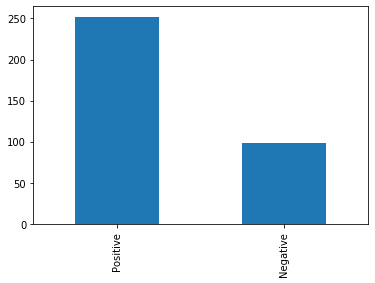

In [56]:
print(balanced_train['VADER Sentiment Score'].value_counts())

balanced_train['VADER Sentiment Score'].value_counts().plot.bar()

## Preparing Sentiment Score for the Models
Assigning train test split to sentiment score VADER sentiment

In [57]:
VADER_labels = balanced_train['VADER Sentiment Score']

VADER_X_train, VADER_X_test, VADER_y_train, VADER_y_test = train_test_split(balanced_processed_features, VADER_labels, test_size=0.2, random_state=0)

## Mulit-Class Support Vector Machine 
On Engineered Sentiment Score

In [58]:
# Linear Kernel
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(VADER_X_train, VADER_y_train)
linear_pred = linear.predict(VADER_X_test)
cm_lin = confusion_matrix(VADER_y_test, linear_pred)
cr_lin = classification_report(VADER_y_test, linear_pred)
accuracy_lin = linear.score(VADER_X_test, VADER_y_test)

# RBF Kernel
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(VADER_X_train, VADER_y_train)
rbf_pred = rbf.predict(VADER_X_test)
cm_rbf = confusion_matrix(VADER_y_test, rbf_pred)
cr_rbf = classification_report(VADER_y_test, rbf_pred)
accuracy_rbf = rbf.score(VADER_X_test, VADER_y_test)

# Polynomial Kernel
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(VADER_X_train, VADER_y_train)
poly_pred = poly.predict(VADER_X_test)
cm_poly = confusion_matrix(VADER_y_test, poly_pred)
cr_poly = classification_report(VADER_y_test, poly_pred)
accuracy_poly = poly.score(VADER_X_test, VADER_y_test)

# Sigmoid Kernel
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(VADER_X_train, VADER_y_train)
sig_pred = sig.predict(VADER_X_test)
cm_sig = confusion_matrix(VADER_y_test, sig_pred)
cr_sig = classification_report(VADER_y_test, sig_pred)
accuracy_sig = sig.score(VADER_X_test, VADER_y_test)

#### Linear Kernel

In [59]:
print('Confusion Matrix of Linear Kernel: \n', cm_lin)
print('\n')
print('Classification Report of Linear Kernel: \n', cr_lin)
print('\n')
print('Accuracy score of Linear Kernel: \n', accuracy_lin)

Confusion Matrix of Linear Kernel: 
 [[ 8 15]
 [ 0 48]]


Classification Report of Linear Kernel: 
               precision    recall  f1-score   support

    Negative       1.00      0.35      0.52        23
    Positive       0.76      1.00      0.86        48

    accuracy                           0.79        71
   macro avg       0.88      0.67      0.69        71
weighted avg       0.84      0.79      0.75        71



Accuracy score of Linear Kernel: 
 0.7887323943661971


#### RBF Kernel

In [60]:
print('Confusion Matrix of RBF Kernel: \n', cm_rbf)
print('\n')
print('Classification Report of RBF Kernel: \n', cr_rbf)
print('\n')
print('Accuracy score of RBF Kernel: \n', accuracy_rbf)

Confusion Matrix of RBF Kernel: 
 [[ 6 17]
 [ 0 48]]


Classification Report of RBF Kernel: 
               precision    recall  f1-score   support

    Negative       1.00      0.26      0.41        23
    Positive       0.74      1.00      0.85        48

    accuracy                           0.76        71
   macro avg       0.87      0.63      0.63        71
weighted avg       0.82      0.76      0.71        71



Accuracy score of RBF Kernel: 
 0.7605633802816901


#### Polynomial Kernel

In [61]:
print('Confusion Matrix of Polynomial Kernel: \n', cm_poly)
print('\n')
print('Classification Report of Polynomial Kernel: \n', cr_poly)
print('\n')
print('Accuracy score of Polynomial Kernel: \n', accuracy_poly)

Confusion Matrix of Polynomial Kernel: 
 [[ 5 18]
 [ 0 48]]


Classification Report of Polynomial Kernel: 
               precision    recall  f1-score   support

    Negative       1.00      0.22      0.36        23
    Positive       0.73      1.00      0.84        48

    accuracy                           0.75        71
   macro avg       0.86      0.61      0.60        71
weighted avg       0.82      0.75      0.69        71



Accuracy score of Polynomial Kernel: 
 0.7464788732394366


#### Sigmoid Kernel

In [62]:
print('Confusion Matrix of Sigmoid Kernel: \n', cm_sig)
print('\n')
print('Classification Report of Sigmoid Kernel: \n', cr_sig)
print('\n')
print('Accuracy score of Sigmoid Kernel: \n', accuracy_sig)

Confusion Matrix of Sigmoid Kernel: 
 [[ 8 15]
 [ 0 48]]


Classification Report of Sigmoid Kernel: 
               precision    recall  f1-score   support

    Negative       1.00      0.35      0.52        23
    Positive       0.76      1.00      0.86        48

    accuracy                           0.79        71
   macro avg       0.88      0.67      0.69        71
weighted avg       0.84      0.79      0.75        71



Accuracy score of Sigmoid Kernel: 
 0.7887323943661971


## Recurrent Neural Networks with Long Short Term Memory 
On Engineered Sentiment Score

In [63]:
# Assigning variables and splitting the dataset for VADER Sentiment
VADER_features = padded_tokenized_review
VADER_target = label_encoder.fit_transform(balanced_train['VADER Sentiment Score'])

VADER_features_train, VADER_features_test, VADER_target_train, VADER_target_test = train_test_split(VADER_features, 
                                                                        VADER_target, test_size = 0.20, random_state = 10)

VADER_features_train.shape, VADER_features_test.shape, VADER_target_train.shape, VADER_target_test.shape

((280, 100), (71, 100), (280,), (71,))

In [64]:
# Setting up LSTM
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 100

embedding_size = 32
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(500))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
model.fit(VADER_features_train, VADER_target_train, epochs=60)

Epoch 1/60
9/9 [==============================] - 2s 230ms/step - loss: 0.8283 - accuracy: 0.6607
Epoch 2/60
9/9 [==============================] - 2s 230ms/step - loss: 0.6542 - accuracy: 0.7214
Epoch 3/60
9/9 [==============================] - 2s 224ms/step - loss: 0.6047 - accuracy: 0.7214
Epoch 4/60
9/9 [==============================] - 2s 224ms/step - loss: 0.6073 - accuracy: 0.7214
Epoch 5/60
9/9 [==============================] - 2s 223ms/step - loss: 0.5973 - accuracy: 0.7214
Epoch 6/60
9/9 [==============================] - 2s 230ms/step - loss: 0.5968 - accuracy: 0.7214
Epoch 7/60
9/9 [==============================] - 2s 255ms/step - loss: 0.5899 - accuracy: 0.7214
Epoch 8/60
9/9 [==============================] - 2s 249ms/step - loss: 0.5894 - accuracy: 0.7286
Epoch 9/60
9/9 [==============================] - 2s 233ms/step - loss: 0.5852 - accuracy: 0.7286
Epoch 10/60
9/9 [==============================] - 2s 226ms/step - loss: 0.5869 - accuracy: 0.7286
Epoch 11/60
9/9 [==

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           60448     
_________________________________________________________________
lstm_1 (LSTM)                (None, 500)               1066000   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 501       
Total params: 1,126,949
Trainable params: 1,126,949
Non-trainable params: 0
_________________________________________________________________


In [67]:
test_loss, test_acc = model.evaluate(VADER_features_test,VADER_target_test)

print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 43ms/step - loss: 0.5660 - accuracy: 0.7324
Test accuracy: 0.7323943376541138


In [68]:
predictions = model.predict(VADER_features_test)

In [69]:
accuracy_score(VADER_target_test, predictions.round())

0.7323943661971831

In [70]:
cnf_matrix=confusion_matrix(VADER_target_test, predictions.round())
cnf_matrix

array([[ 2, 19],
       [ 0, 50]], dtype=int64)

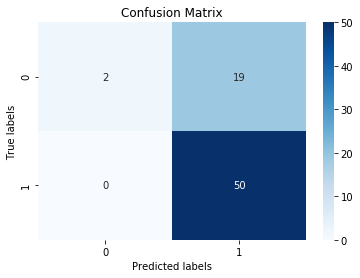

In [71]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

## Ensemble Technique: Voting Classifier
Used Voting Classifier Technique on Random Forest, XGBoost, Linear SVM, RBF SVM, Polynomial SVM, Sigmoid SVM.

In [72]:
# group / ensemble of models 
estimator = []
estimator.append(('Random Forest', RandomForestClassifier(n_estimators=200, random_state=0)))
estimator.append(('XGBoost', XGBClassifier(random_state=29, learning_rate=0.7)))
estimator.append(('Linear SVM', svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')))
estimator.append(('RBF SVM', svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')))
estimator.append(('Polynomial SVM', svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')))
estimator.append(('Sigmoid SVM', svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')))

In [73]:
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(VADER_X_train, VADER_y_train) 
ensemble_pred = vot_hard.predict(VADER_X_test) 

# Checking Confusion Matrix, Classification Report, and Accuracy Score 
print('Confusion Matrix: \n', confusion_matrix(VADER_y_test, ensemble_pred))
print('\n Classification Report: \n', classification_report(VADER_y_test, ensemble_pred))
print('\n Accuracy: ', accuracy_score(VADER_y_test, ensemble_pred))

Confusion Matrix: 
 [[ 7 16]
 [ 0 48]]

 Classification Report: 
               precision    recall  f1-score   support

    Negative       1.00      0.30      0.47        23
    Positive       0.75      1.00      0.86        48

    accuracy                           0.77        71
   macro avg       0.88      0.65      0.66        71
weighted avg       0.83      0.77      0.73        71


 Accuracy:  0.7746478873239436


### Week 3 Analysis

We shall now compare the accuracy scores of the models used on the given 'sentiment' versus our engineered sentiment.

#### Using 'sentiment' column as target.

*Multi Class SVM:*

Linear Kernel: __60.5%__

RBF Kernel: __63.3%__

Polynomial Kernel:__56.3%__

Sigmoid Kernel: __57.7%__

RNN with LSTM: __32.3%__

Voting Classifier: __60.5%__

#### Engineered Sentiment using VADER:

*Multi Class SVM:*

Linear Kernel: __78.8.%__

RBF Kernel: __76%__

Polynomial Kernel: __74.6%__

Sigmoid Kernel: __78.8.%__

RNN with LSTM: __73.2%__

Voting Classifier: __77.4%__

__Observation__: Generally, the results are below 60% accuracy when the machine learning algorithms are used on the given 'sentiment column'. The accuracy was especially poor with LSTM with 32.3% accuracy. But when we used the engineered sentiment "VADER", we had an increase in accuracy and this can be attributed to the fact that there were only 2 targets with the engineered sentiment which was Positive & Negative whereas the given 'sentiment' had 3 targets which were Positive, Neutral, and Negative. With the engineered sentiment, the accuracy was generally above 70% wherein the biggest improvement seem to be the LSTM model which shot from 32.3% to 73.2%.

## Project Task: Week 4

Applying LSTM:

1. Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.). Hint: Another variation of LSTM, GRU (Gated Recurrent Units) can be tried as well.

2. Compare the accuracy of neural nets with traditional ML based algorithms.

3. Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive, negative, and neutral. 

Hint: Use techniques like Grid Search, Cross-Validation and Random Search


Since we used RNN with LSTM in the week 3 goals for the "neural nets" portion, we will now use __Gated Reccurent Units (GRU)__ for week 4. Also, Nishant, the instructor asked us to compare the performance of the accuracy score of the LSTM/RNN with the given 'sentiment' metric and the engineered sentiment score (VADER Sentiment Score) which will be done here.

## Recurrent Neural Network with Gated Recurrent Unit
With the given 'sentiment' metric

In [74]:
# We will now skip to the setting of GRU since we have already set the data for this
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 100

embedding_size = 32
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(GRU(500))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
model.fit(features_train, target_train, epochs=60)

Epoch 1/60
9/9 [==============================] - 2s 176ms/step - loss: 0.4047 - accuracy: 0.3357
Epoch 2/60
9/9 [==============================] - 2s 177ms/step - loss: -0.1473 - accuracy: 0.3357
Epoch 3/60
9/9 [==============================] - 2s 177ms/step - loss: -0.1321 - accuracy: 0.3357
Epoch 4/60
9/9 [==============================] - 2s 176ms/step - loss: -0.1230 - accuracy: 0.3357
Epoch 5/60
9/9 [==============================] - 2s 176ms/step - loss: -0.1652 - accuracy: 0.3357
Epoch 6/60
9/9 [==============================] - 2s 177ms/step - loss: -0.1333 - accuracy: 0.3357
Epoch 7/60
9/9 [==============================] - 2s 181ms/step - loss: -0.1713 - accuracy: 0.3357
Epoch 8/60
9/9 [==============================] - 2s 177ms/step - loss: -0.1716 - accuracy: 0.3357
Epoch 9/60
9/9 [==============================] - 2s 179ms/step - loss: -0.1740 - accuracy: 0.3357
Epoch 10/60
9/9 [==============================] - 2s 177ms/step - loss: -0.1735 - accuracy: 0.3357
Epoch 11/6

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           60448     
_________________________________________________________________
gru (GRU)                    (None, 500)               801000    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 501       
Total params: 861,949
Trainable params: 861,949
Non-trainable params: 0
_________________________________________________________________


In [77]:
test_loss, test_acc = model.evaluate(features_test,target_test)

print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 34ms/step - loss: -4.0163 - accuracy: 0.4225
Test accuracy: 0.4225352108478546


In [78]:
predictions = model.predict(features_test)

In [79]:
accuracy_score(target_test, predictions.round())

0.4225352112676056

In [80]:
cnf_matrix=confusion_matrix(target_test, predictions.round())
cnf_matrix

array([[ 8, 17,  0],
       [ 1, 22,  0],
       [ 2, 21,  0]], dtype=int64)

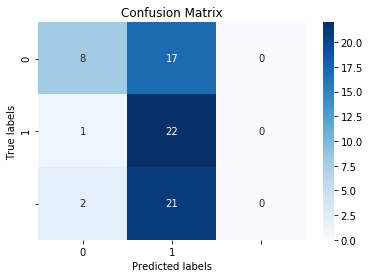

In [81]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

## Recurrent Neural Netwoks with Gated Recurrent Unit
With our Engineered Sentiment Score (VADER Sentiment Score)

In [82]:
# We will now skip to the setting of GRU since we have already set the data for this
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 100

embedding_size = 32
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(GRU(500))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
model.fit(VADER_features_train, VADER_target_train, epochs=60)

Epoch 1/60
9/9 [==============================] - 2s 176ms/step - loss: 0.6457 - accuracy: 0.7250
Epoch 2/60
9/9 [==============================] - 2s 179ms/step - loss: 0.6024 - accuracy: 0.7214
Epoch 3/60
9/9 [==============================] - 2s 177ms/step - loss: 0.5899 - accuracy: 0.7214
Epoch 4/60
9/9 [==============================] - 2s 177ms/step - loss: 0.5956 - accuracy: 0.7214
Epoch 5/60
9/9 [==============================] - 2s 179ms/step - loss: 0.5907 - accuracy: 0.7214
Epoch 6/60
9/9 [==============================] - 2s 178ms/step - loss: 0.5944 - accuracy: 0.7214
Epoch 7/60
9/9 [==============================] - 2s 177ms/step - loss: 0.5881 - accuracy: 0.7214
Epoch 8/60
9/9 [==============================] - 2s 179ms/step - loss: 0.5863 - accuracy: 0.7286
Epoch 9/60
9/9 [==============================] - 2s 181ms/step - loss: 0.5876 - accuracy: 0.7286
Epoch 10/60
9/9 [==============================] - 2s 179ms/step - loss: 0.5860 - accuracy: 0.7286
Epoch 11/60
9/9 [==

In [84]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 32)           60448     
_________________________________________________________________
gru_1 (GRU)                  (None, 500)               801000    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 861,949
Trainable params: 861,949
Non-trainable params: 0
_________________________________________________________________


In [85]:
test_loss, test_acc = model.evaluate(VADER_features_test,VADER_target_test)

print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 34ms/step - loss: 0.5893 - accuracy: 0.7324
Test accuracy: 0.7323943376541138


In [86]:
predictions = model.predict(VADER_features_test)

In [87]:
accuracy_score(VADER_target_test, predictions.round())

0.7323943661971831

In [88]:
cnf_matrix=confusion_matrix(VADER_target_test, predictions.round())
cnf_matrix

array([[ 4, 17],
       [ 2, 48]], dtype=int64)

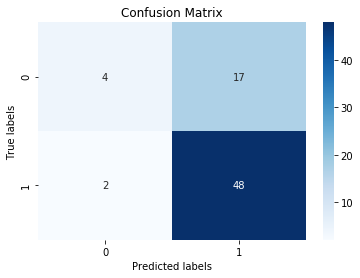

In [89]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

### Final Observation

We shall now compare the accuracy scores of the machine learning and neural networks used from week 3 and week 4 wherein we will compare the accuracy when using the given 'sentiment' versus using the engineered sentiment score (VADER).

#### Using 'sentiment' column as target.

*Multi Class SVM:*

Linear Kernel: __60.5%__

RBF Kernel: __63.3%__

Polynomial Kernel:__56.3%__

Sigmoid Kernel: __57.7%__

RNN with LSTM: __32.3%__

RNN with GRU: __42.2%__

Voting Classifier: __60.5%__

#### Engineered Sentiment using VADER:

*Multi Class SVM:*

Linear Kernel: __78.8.%__

RBF Kernel: __76%__

Polynomial Kernel: __74.6%__

Sigmoid Kernel: __78.8.%__

RNN with LSTM: __73.2%__

RNN with GRU: __73.2%__

Voting Classifier: __77.4%__

__Observation__: Using 'sentiment' column with the Machine learning and neural network has given us an accuracy score, generally ranging between 30-60% whereas there is a substantial increase in accuracy when we used the engineered score wherein the accuracy is generally ranging between 70-80%. When comparing the RNN and GRU, the GRU seemed to perform better with the given 'sentiment' wherein it had a 42% accuracy as compared to LSTM's accuracy score of 32%. But when we used the engineered sentiment with LSTM and GRU, they had the same accuracy score of 73.2%. Out of all the machine learning and neural network models we used for week 3 and 4, the model with the highest accuracy when using the given 'sentiment' is the Multi Class SVM's RBF Kernel with an accuracy score of 63.3% whereas the model with the highest accuracy score when using the engineered sentiment (VADER) is a tie between Multi Class SVM's Linear & Sigmoid Kernel with an accuracy score of 78.8%.

## Optional Tasks: Week 4

Topic Modeling:

1. Cluster similar reviews.

Note: Some reviews may talk about the device as a gift-option. Other reviews may be about product looks and some may highlight about its battery and performance. Try naming the clusters.
   
2. Perform Topic Modeling
Hint: Use scikit-learn provided Latent Dirchlette Allocation (LDA) and Non-Negative Matrix Factorization (NMF).

For this task, I will utilize the __Hiearchical Dirchlet Process Topic Modelling__ in Gensim. The aim is to analyze the reviews that are being discussed in the positive, neutral, and negative reviews given by the sentiment metric. We will first create a dataset for each review and apply HDP to each dataset.

## Creating datasets for each sentiment

In [90]:
Positive = train[train['sentiment'] == 'Positive']
Neutral = train[train['sentiment'] == 'Neutral']
Negative = train[train['sentiment'] == 'Negative']

In [91]:
Positive.shape, Neutral.shape, Negative.shape

((4686, 8), (197, 8), (117, 8))

## Topic Modelling for Positive Reviews

In [92]:
# Importing needed libraries
import os
from pandas import Series
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

# spacy for lemmatization
import spacy

In [93]:
# NLTK Stop words (it is important to note that you have to add the words that you do not need for analysis here so that the topic model will disregard topics that you do not need)
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [94]:
# Converting reviews to list for the model's understanding
data = list(train['reviews_text'])
data[:1]

['Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ads, Amazon need this to subsidize the tablet and will remove the adds if you pay them $15.Inability to access other apps except the ones from Amazon. There is a way which I was able to accomplish to add the Google Play storeNet this is a great tablet for the money']

In [95]:
#Tokenize words and Clean-up text (remove punctuation)
def sent_to_words(sentence):
    for sentence in sentence:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words)

[['purchased', 'on', 'black', 'fridaypros', 'great', 'price', 'even', 'off', 'sale', 'very', 'powerful', 'and', 'fast', 'with', 'quad', 'core', 'processors', 'amazing', 'soundwell', 'builtcons', 'amazon', 'ads', 'amazon', 'need', 'this', 'to', 'subsidize', 'the', 'tablet', 'and', 'will', 'remove', 'the', 'adds', 'if', 'you', 'pay', 'them', 'inability', 'to', 'access', 'other', 'apps', 'except', 'the', 'ones', 'from', 'amazon', 'there', 'is', 'way', 'which', 'was', 'able', 'to', 'accomplish', 'to', 'add', 'the', 'google', 'play', 'storenet', 'this', 'is', 'great', 'tablet', 'for', 'the', 'money'], ['purchased', 'two', 'amazon', 'in', 'echo', 'plus', 'and', 'two', 'dots', 'plus', 'four', 'fire', 'sticks', 'and', 'the', 'hub', 'philips', 'hue', 'for', 'lamp', 'for', 'the', 'family', 'at', 'christmas', 'aom', 'so', 'happy', 'with', 'these', 'purchases', 'and', 'learning', 'so', 'much', 'with', 'alexa', 'you', 'can', 'start', 'your', 'daily', 'routine', 'with', 'alexa', 'and', 'program', 'i

In [96]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['purchased', 'on', 'black', 'fridaypros', 'great', 'price', 'even', 'off', 'sale', 'very', 'powerful', 'and', 'fast', 'with', 'quad', 'core', 'processors', 'amazing', 'soundwell', 'builtcons', 'amazon', 'ads', 'amazon', 'need', 'this', 'to', 'subsidize', 'the', 'tablet', 'and', 'will', 'remove', 'the', 'adds', 'if', 'you', 'pay', 'them', 'inability', 'to', 'access', 'other', 'apps', 'except', 'the', 'ones', 'from', 'amazon', 'there', 'is', 'way', 'which', 'was', 'able', 'to', 'accomplish', 'to', 'add', 'the', 'google', 'play', 'storenet', 'this', 'is', 'great', 'tablet', 'for', 'the', 'money']


In [97]:
data_words# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [98]:
#Remove Stopwords, Make Bigrams and Lemmatize

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']) #['NOUN', 'ADJ', 'VERB', 'ADV']

print(data_lemmatized)

[['purchase', 'black', 'great', 'price', 'even', 'sale', 'powerful', 'fast', 'quad', 'processor', 'amazing', 'soundwell', 'builtcon', 'ad', 'need', 'subsidize', 'tablet', 'remove', 'add', 'pay', 'inability', 'access', 'app', 'one', 'way', 'able', 'add', 'storenet', 'great', 'tablet', 'money'], ['purchase', 'dot', 'fire', 'stick', 'family', 'aom', 'happy', 'purchase', 'learn', 'much', 'start', 'daily', 'routine', 'program', 'would', 'like', 'include', 'news', 'weather', 'music', 'horoscope', 'also', 'start', 'day', 'compliment', 'think', 'important', 'alexa', 'give', 'good', 'chili', 'recipe', 'good', 'call', 'want', 'husband', 'use', 'alexa', 'stay', 'organized', 'business', 'date', 'reminder', 'way', 'go'], ['average', 'alexa', 'option', 'show', 'thing', 'screen', 'still', 'limited'], ['good', 'product', 'exactly', 'want', 'good', 'price'], ['purchase', 'buy', 'niece', 'case', 'compare', 'hold', 'protect', 'tablet', 'many', 'time', 'drop'], ['great', 'product', 'light', 'download', 'o

In [99]:
#We are now creating the Bag-of-Words and assigning a unique number(tokenizing) to the words. 

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1)]]


In [100]:
#Shows us how many unique (one of its kind) id (tokens) we have in the file after doing our pre processing
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 3535


In [101]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('able', 1),
  ('access', 1),
  ('ad', 1),
  ('add', 2),
  ('amazing', 1),
  ('app', 1),
  ('black', 1),
  ('builtcon', 1),
  ('even', 1),
  ('fast', 1),
  ('great', 2),
  ('inability', 1),
  ('money', 1),
  ('need', 1),
  ('one', 1),
  ('pay', 1),
  ('powerful', 1),
  ('price', 1),
  ('processor', 1),
  ('purchase', 1),
  ('quad', 1),
  ('remove', 1),
  ('sale', 1),
  ('soundwell', 1),
  ('storenet', 1),
  ('subsidize', 1),
  ('tablet', 2),
  ('way', 1)]]

In [102]:
#Let's check the frequency of the words used:
dict_corpus = {}

for i in range(len(corpus)):
    for idx, freq in corpus[i]:
        if id2word[idx] in dict_corpus:
            dict_corpus[id2word[idx]] += freq
        else:
            dict_corpus[id2word[idx]] = freq

In [103]:
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

Count of Frequency of Positive Reviews


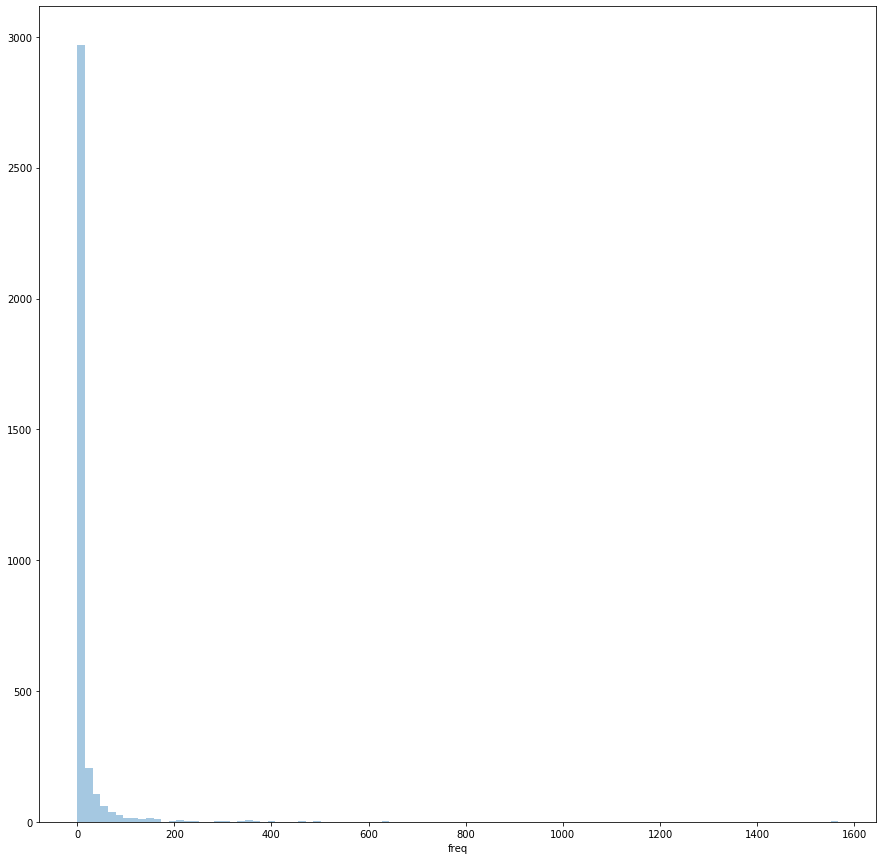

In [104]:
print('Count of Frequency of Positive Reviews')
plt.figure(figsize=(15,15))
sns.distplot(dict_df['freq'], bins=100, kde=False);

In [105]:
#Here are the words that are most frequently used for your dataset 
dict_df.sort_values('freq', ascending=False).head(20)

,freq
great,1567
love,1565
use,1515
tablet,1126
buy,1100
good,931
easy,875
work,638
get,629
well,627


In [106]:
#Here are the words that are least frequently used for your dataset:
dict_df.sort_values('freq', ascending=False).tail(20)

,freq
alexia,1
prompt,1
pizza,1
horizon,1
conjunction,1
roam,1
fee,1
deep,1
unclear,1
warenty,1


## Hierarchical Dirichlet Process for Positive Reviews

In [107]:
from gensim.models import HdpModel
hdp = HdpModel(corpus, id2word, chunksize=10000)

In [108]:
len(hdp.print_topics())

20

In [109]:
hdp.print_topics(num_topics=20)

[(0,
  '0.003*strong + 0.002*locate + 0.002*deliver + 0.002*disability + 0.002*surpass + 0.002*durrible + 0.002*lovit + 0.002*utility + 0.002*depth + 0.002*letter'),
 (1,
  '0.003*privacy + 0.002*elegant + 0.002*able + 0.002*decor + 0.002*foldover + 0.002*woo + 0.002*shot + 0.002*homebase + 0.002*significantly + 0.002*rhyme'),
 (2,
  '0.002*weekend + 0.002*externally + 0.002*positive + 0.002*receipt + 0.002*rubber + 0.002*launcher + 0.002*visual + 0.002*begin + 0.002*foam + 0.002*mount'),
 (3,
  '0.002*twin + 0.002*deck + 0.002*unschooled + 0.002*quad + 0.002*press + 0.002*conpack + 0.002*empty + 0.002*combined + 0.002*video_chat + 0.002*devise'),
 (4,
  '0.002*sake + 0.002*match + 0.002*store + 0.002*experimental + 0.002*fam + 0.002*font + 0.002*purchasing + 0.002*independent + 0.002*onscreen + 0.002*dependable'),
 (5,
  '0.002*unlimited + 0.002*never + 0.002*procesor + 0.002*hold + 0.002*elmo + 0.002*horrible + 0.002*depend + 0.002*news + 0.002*glove + 0.002*jbl'),
 (6,
  '0.003*even

## Topic Modelling for Neutral Reviews

In [110]:
# Made the pre processing code shorter.
data = list(Neutral.reviews_text)

#Tokenize words and Clean-up text (remove punctuation)
def sent_to_words(sentence):
    for sentence in sentence:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

data_words# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Remove Stopwords, Make Bigrams and Lemmatize

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']) #['NOUN', 'ADJ', 'VERB', 'ADV']

#We are now creating the Bag-of-Words and assigning a unique number(tokenizing) to the words. 

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# This function can filter out words that occur in more or less than  number of documents.
id2word.filter_extremes(no_below=2) #if you want to filter top words, use this(in percentage): no_above=0.5

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [111]:
#Let's check the frequency of the words used:
dict_corpus = {}

for i in range(len(corpus)):
    for idx, freq in corpus[i]:
        if id2word[idx] in dict_corpus:
            dict_corpus[id2word[idx]] += freq
        else:
            dict_corpus[id2word[idx]] = freq

In [112]:
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

Count of Frequency of Neutral Reviews


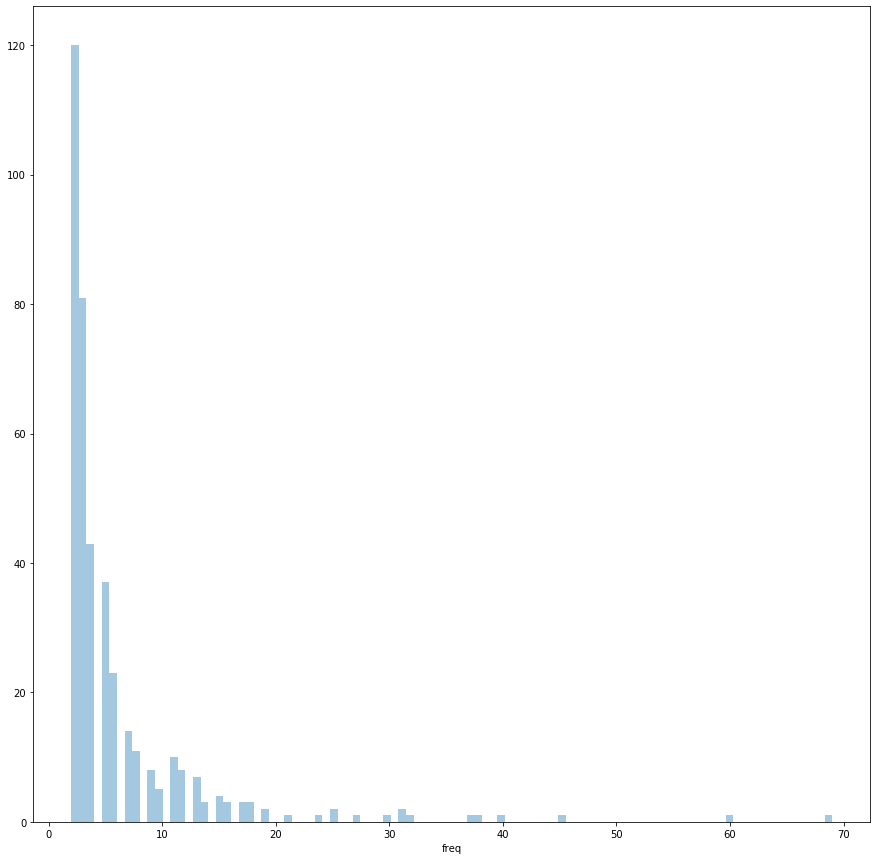

In [113]:
print('Count of Frequency of Neutral Reviews')
plt.figure(figsize=(15,15))
sns.distplot(dict_df['freq'], bins=100, kde=False);

In [114]:
#Here are the words that are most frequently used for your dataset 
dict_df.sort_values('freq', ascending=False).head(20)

,freq
tablet,69
good,60
work,45
use,40
buy,38
great,37
time,32
kid,31
well,31
app,30


In [115]:
#Here are the words that are least frequently used for your dataset:
dict_df.sort_values('freq', ascending=False).tail(20)

,freq
loading,2
stop,2
flaw,2
search,2
ready,2
tv,2
relax,2
smart,2
room,2
amount,2


## Hierarchical Dirichlet Process for Neutral Reviews

In [116]:
hdp = HdpModel(corpus, id2word, chunksize=10000)

In [117]:
len(hdp.print_topics())

20

In [118]:
hdp.print_topics(num_topics=20)

[(0,
  '0.016*bulb + 0.015*sale + 0.013*system + 0.013*son + 0.013*music + 0.012*bring + 0.012*defective + 0.011*ad + 0.011*unit + 0.010*access'),
 (1,
  '0.016*regular + 0.013*web + 0.011*value + 0.010*internet + 0.010*item + 0.009*different + 0.009*really + 0.009*bulky + 0.009*dollar + 0.009*unable'),
 (2,
  '0.013*pretty + 0.013*buy + 0.012*ipad + 0.012*month + 0.010*end + 0.010*port + 0.010*large + 0.010*get + 0.010*screen + 0.009*child'),
 (3,
  '0.015*bulb + 0.013*else + 0.011*real + 0.011*end + 0.011*look + 0.011*cool + 0.010*fire + 0.010*model + 0.009*difference + 0.009*problem'),
 (4,
  '0.017*well + 0.016*wireless + 0.014*consider + 0.011*week + 0.011*package + 0.011*fine + 0.010*friendly + 0.010*loading + 0.010*hand + 0.010*home'),
 (5,
  '0.017*work + 0.012*activate + 0.012*answer + 0.011*command + 0.011*fill + 0.010*drop + 0.010*basic + 0.010*play + 0.009*majorly + 0.009*feature'),
 (6,
  '0.015*battery + 0.014*button + 0.014*available + 0.011*respond + 0.011*much + 0.011*

## Topic Modelling for Negative Reviews

In [119]:
# Made the pre processing code shorter.
data = list(Negative.reviews_text)

#Tokenize words and Clean-up text (remove punctuation)
def sent_to_words(sentence):
    for sentence in sentence:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

data_words# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Remove Stopwords, Make Bigrams and Lemmatize

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']) #['NOUN', 'ADJ', 'VERB', 'ADV']

#We are now creating the Bag-of-Words and assigning a unique number(tokenizing) to the words. 

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# This function can filter out words that occur in more or less than  number of documents.
id2word.filter_extremes(no_below=2) #if you want to filter top words, use this(in percentage): no_above=0.5

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [120]:
#Let's check the frequency of the words used:
dict_corpus = {}

for i in range(len(corpus)):
    for idx, freq in corpus[i]:
        if id2word[idx] in dict_corpus:
            dict_corpus[id2word[idx]] += freq
        else:
            dict_corpus[id2word[idx]] = freq

In [121]:
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

Count of Frequency of Negative Reviews


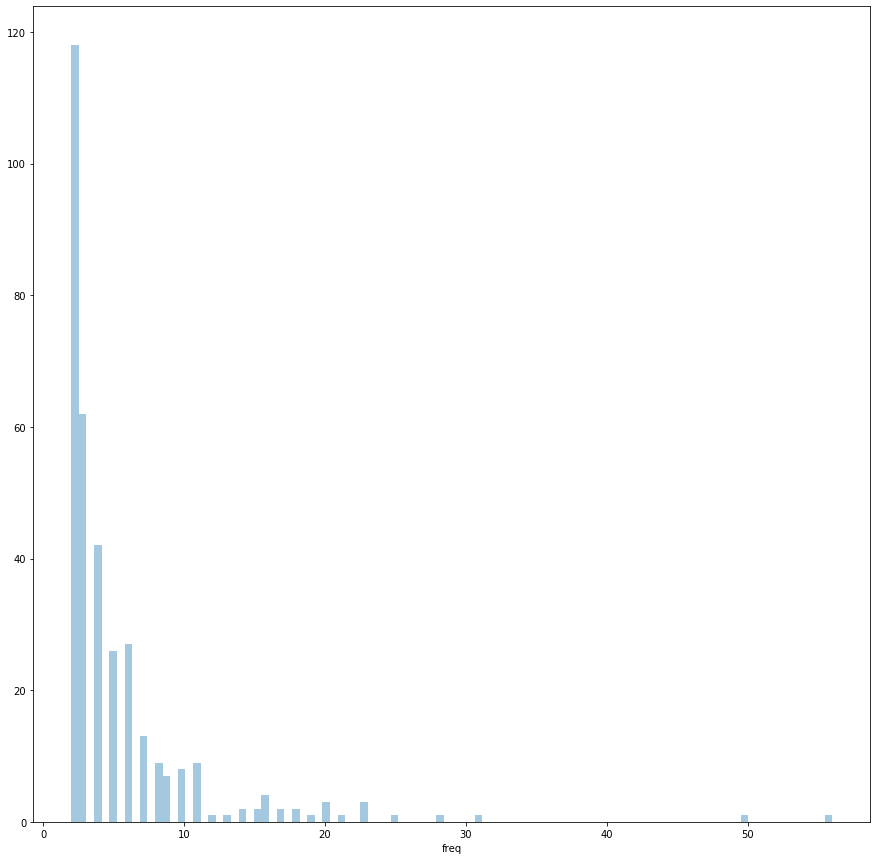

In [122]:
print('Count of Frequency of Negative Reviews')
plt.figure(figsize=(15,15))
sns.distplot(dict_df['freq'], bins=100, kde=False);

In [123]:
#Here are the words that are most frequently used for your dataset 
dict_df.sort_values('freq', ascending=False).head(20)

,freq
buy,56
use,50
work,31
app,28
would,25
tablet,23
device,23
year,23
last,21
try,20


In [124]:
#Here are the words that are least frequently used for your dataset:
dict_df.sort_values('freq', ascending=False).tail(20)

,freq
law,2
brand,2
avoid,2
receive,2
wish,2
fed,2
mall,2
close,2
noth,2
recieve,2


## Hierarchical Dirichlet Process for Negative Reviews

In [125]:
hdp = HdpModel(corpus, id2word, chunksize=10000)

In [126]:
len(hdp.print_topics())

20

In [127]:
hdp.print_topics(num_topics=20)

[(0,
  '0.018*help + 0.016*automatically + 0.015*time + 0.013*respond + 0.013*expect + 0.012*book + 0.011*echo + 0.011*want + 0.011*difficult + 0.010*instal'),
 (1,
  '0.017*video + 0.016*game + 0.013*instead + 0.012*amazon + 0.012*need + 0.011*power + 0.011*size + 0.011*fail + 0.011*often + 0.010*want'),
 (2,
  '0.017*stop + 0.014*update + 0.013*tie + 0.013*outperform + 0.012*customer + 0.012*bit + 0.011*user + 0.011*install + 0.011*pretty + 0.010*allow'),
 (3,
  '0.019*experience + 0.017*service + 0.015*piece + 0.014*recieve + 0.014*slot + 0.013*sound + 0.012*mode + 0.012*give + 0.012*need + 0.012*unable'),
 (4,
  '0.020*brand + 0.018*task + 0.013*start + 0.011*skill + 0.010*actually + 0.010*several + 0.010*mean + 0.010*answer + 0.009*code + 0.009*household'),
 (5,
  '0.012*loose + 0.011*move + 0.011*order + 0.011*fed + 0.010*connected + 0.010*speaker + 0.010*guess + 0.010*different + 0.009*worthless + 0.009*step'),
 (6,
  '0.018*internet + 0.017*info + 0.016*month + 0.015*offer + 0.

#### References used for this Capstone:

Multinomial NB Documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Undersampling:
https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb

Random Forest and Processed Features: https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/

XGBoost: https://towardsdatascience.com/social-media-sentiment-analysis-part-ii-bcacca5aaa39

Multi-Class Support Vector Machine: https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02 and https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

RNN: https://towardsdatascience.com/application-of-rnn-for-customer-review-sentiment-analysis-178fa82e9aaf, https://medium.com/@lamiae.hana/a-step-by-step-guide-on-sentiment-analysis-with-rnn-and-lstm-3a293817e314, https://towardsdatascience.com/sentiment-analysis-using-lstm-step-by-step-50d074f09948, https://analyticsindiamag.com/how-to-implement-lstm-rnn-network-for-sentiment-analysis/

Voting Classifier: https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/, https://www.youtube.com/watch?v=YWUREIPdQUE

VADER: https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

GRU: https://www.youtube.com/watch?v=QtcxL-gd8Ok

Topic Modelling with HDP: https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28, https://github.com/marcmuon/nlp_yelp_review_unsupervised/blob/master/notebooks/2.0_optional_HDP_Model_to_find_number_of_topics_for_LDA.ipynb, http://blog.echen.me/2012/03/20/infinite-mixture-models-with-nonparametric-bayes-and-the-dirichlet-process/, https://github.com/joewandy/hlda, https://github.com/joewandy/hlda/blob/master/notebooks/bbc_test.ipynb

F1 Score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html